## **Análisis Bivariado**

#### 📘 **Importación de librerías** 
Importamos las librerías que necesitaremos en nuestro análisis **bivariado**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from statistics import mode
from scipy.stats import zscore
from scipy.stats import skew
from scipy.stats import chi2_contingency
import seaborn as sns

#### 🛜 **Importación del dataset Telco preparado**

Este dataset proviene de la cartera morosa de una empresa de telecomunicaciones que da servicio al Valle y al Tolima y se le realizó una preparación previa en el archivo `Univariado.ipynb` 

In [4]:
## Cargar datos 
df = pd.read_csv("./data/dataset_deudamorosa.csv", sep=';')

## respaldo - backup 
df_original = df.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75882 entries, 0 to 75881
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TARIFA_PS                 75882 non-null  object 
 1   ESTADO_CLIENTE            75882 non-null  object 
 2   ESTADO_SUMINISTRO         75882 non-null  object 
 3   ESTADO_FACTURACION        75882 non-null  object 
 4   DEUDA                     75882 non-null  int64  
 5   ANTIGUEDAD_SALDO          75882 non-null  int64  
 6   CICLO                     75882 non-null  int64  
 7   ZONA                      75882 non-null  float64
 8   CLASE_SERVICIO            75882 non-null  object 
 9   ESTRATO                   75882 non-null  int64  
 10  DEPTO                     75882 non-null  object 
 11  MUNICIPIO                 75882 non-null  object 
 12  BARRIO                    75882 non-null  object 
 13  TOTAL_FACTURADO           75882 non-null  float64
 14  FECHA_

#### **Variable Categórica `ES_MOROSO`** 
El análisis en el archivo **Univariado.ipynb** fue fundamental para:  

- **Eliminar sesgos críticos**  
Se filtraron una cantidad masiva de valores de deudas en cero o negativas, ya que no representan cartera a recuperar. Al igual que outliers atípicos de deudas extremadamente grandes. 

- **Distribución representativa**  
Al depurar los datos, la distribución de la deuda restante refleja mejor la distribución de los datos objetivos reales para estrategias de recaudo: **clientes con deuda a recuperar.** 

No obstante, de acuerdo a las reglas de negocio, un cliente se califica como **moroso** y candidato a **suspensión del servicio** cuando su **`ANTIGUEDAD_SALDO`** es mayor a 2 meses, es decir, cuando lleva más de dos meses sin pagar sus facturas. 

Por esa razón, se crea la variable binaria **`ES_MOROSO`** para clasificar el estado real de morosidad. 


In [5]:
## Visualización de los valores de antiguedad saldo
df['ANTIGUEDAD_SALDO'].value_counts()

ANTIGUEDAD_SALDO
1     32393
2     11514
3      6781
9      3971
8      3877
4      3844
5      2951
7      2887
6      2882
10     2267
0       976
11      836
12      360
13      197
14       89
15       33
16       17
17        3
20        1
24        1
18        1
21        1
Name: count, dtype: int64

In [6]:
df['ES_MOROSO'] = (df['ANTIGUEDAD_SALDO'] > 2).astype(int)
df['ES_MOROSO'].value_counts()

ES_MOROSO
0    44883
1    30999
Name: count, dtype: int64

In [7]:
df['ES_MOROSO'].describe()

count    75882.000000
mean         0.408516
std          0.491563
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: ES_MOROSO, dtype: float64

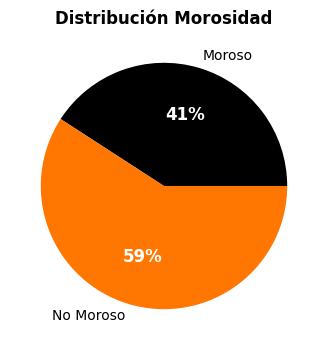

In [8]:
counts = [(df["ES_MOROSO"] == 1).sum(), (df["ES_MOROSO"] == 0).sum()]
total = sum(counts)
percentages = [f'{(count/total)*100:.0f}%' for count in counts]

plt.figure(figsize=(6, 4))
plt.title("Distribución Morosidad", fontsize=12, fontweight='bold')

wedges, texts, autotexts = plt.pie(
    counts, 
    labels=["Moroso", "No Moroso"], 
    autopct=lambda p: f'{p:.0f}%',
    colors=['#000000', '#ff7701']
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.grid(True, alpha=0.3)
plt.show()

#### **Interpretación de `ES_MOROSO`**  
- **Media: 0.4085:**  
El **40.85%** de los clientes con deuda activa son clientes morosos (candidatos a suspensión o que ya se encuentran suspendidos). 

- **Desviación estándar: 0.49**  
**Std < 0.5** indica que los datos están dispersos y que es una buena muestra (no existen sesgos). 



---
#### **Análisis Bivariado** **`ES_MOROSO`** y **`MUNICIPIO`**  

Seleccionamos la feature **municipio** ya que es relevante para dar respuesta a nuestra pregunta **SMART**, que está relacionada con reconocer zonas geograficas que concentren almenos 60%. 



#### **Tabla de contingencia**  
Realizamos tabla de contingencia entre las dos variables

In [9]:
tabla_contingencia = pd.crosstab(df['MUNICIPIO'], df['ES_MOROSO'])
tabla_ordenada = tabla_contingencia.sort_values(by=1, ascending=False)
print("Tabla de contingencia - Ordenada")
print(tabla_ordenada)

Tabla de contingencia - Ordenada
ES_MOROSO                      0     1
MUNICIPIO                             
73001-IBAGUÉ               13818  7097
76520-PALMIRA               7293  5019
76834-TULUÁ                 3144  3487
76130-CANDELARIA            3104  2444
76364-JAMUNDÍ               2898  2258
76111-GUADALAJARA DE BUGA   2474  1773
73449-MELGAR                2025  1490
73268-ESPINAL               2132  1052
76248-EL CERRITO            1321   934
76563-PRADERA                974   813
76147-CARTAGO                405   558
76895-ZARZAL                 381   452
76892-YUMBO                  716   427
76318-GUACARÍ                389   420
73585-PURIFICACIÓN           677   369
76109-BUENAVENTURA           321   341
76622-ROLDANILLO             353   316
73148-CARMEN DE APICALÁ      300   303
76306-GINEBRA                264   239
76736-SEVILLA                187   215
76400-LA UNIÓN               176   197
73124-CAJAMARCA              170   174
76616-RIOFRÍO                15

#### **Correlación: Chi-Cuadrado y P-value**

In [18]:
import pandas as pd
from scipy.stats import chi2_contingency

# Usamos la misma columna de morosidad creada antes
df['MOROSO'] = df['DEUDA'].apply(lambda x: 'Moroso' if x > 0 else 'No Moroso')

# Crear tabla de contingencia Municipio vs Morosidad
contingencia = pd.crosstab(df['MUNICIPIO'], df['MOROSO'])

# Aplicar Chi-Cuadrado
chi2, p, dof, expected = chi2_contingency(contingencia)

print("=== Resultados Chi-Cuadrado ===")
print(f"Chi2: {chi2:.4f}")
print(f"Grados de libertad: {dof}")
print(f"P-value: {p:.6f}")

if p < 0.05:
    print("➡ Existe una relación significativa entre MUNICIPIO y ser MOROSO.")
else:
    print("➡ No se encontró una relación significativa entre MUNICIPIO y ser MOROSO.")


=== Resultados Chi-Cuadrado ===
Chi2: 0.0000
Grados de libertad: 0
P-value: 1.000000
➡ No se encontró una relación significativa entre MUNICIPIO y ser MOROSO.


#### **Extraemos el top 10 municipios con mayor porcentajes**  
Al haber tantos municipios, para no tener gráficos saturados de información, vamos a extraer los 10 municipios con mayores porcentajes de morosidad. 

In [13]:
top_municipios_morosidad = df.groupby('MUNICIPIO').agg(
    TOTAL_CLIENTES=('ES_MOROSO', 'count'),
    TOTAL_MOROSOS=('ES_MOROSO', 'sum'),
    PORCENTAJE_MOROSIDAD=('ES_MOROSO', 'mean')
).reset_index()

top_municipios_morosidad['PORCENTAJE_MOROSIDAD'] = top_municipios_morosidad['PORCENTAJE_MOROSIDAD'] * 100
top_10_morosos = top_municipios_morosidad.nlargest(10, 'TOTAL_MOROSOS')

#### **Gráfico de barras** 


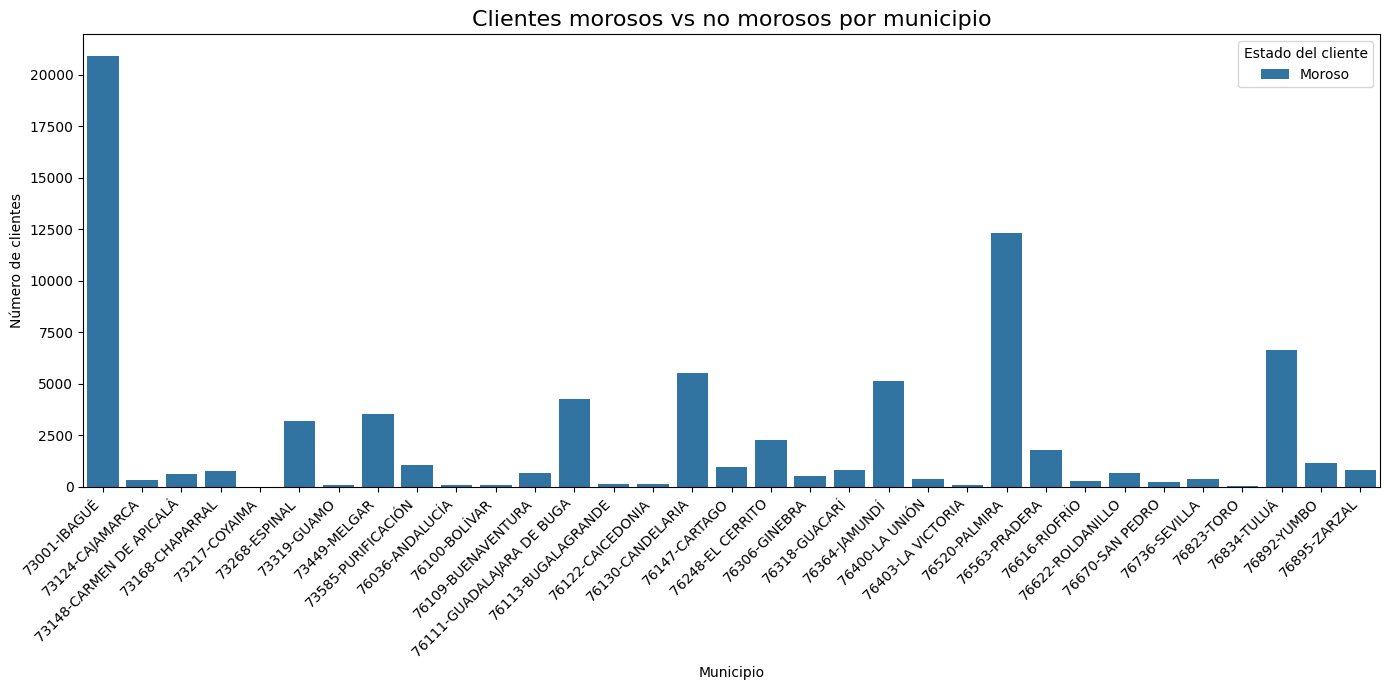

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/dataset_deudamorosa.csv", sep=';')

df['MOROSO'] = df['DEUDA'].apply(lambda x: 'Moroso' if x > 0 else 'No Moroso')

municipio_morosidad = df.groupby(['MUNICIPIO', 'MOROSO']).size().reset_index(name='count')

plt.figure(figsize=(14,7))
sns.barplot(data=municipio_morosidad, x='MUNICIPIO', y='count', hue='MOROSO')

plt.title("Clientes morosos vs no morosos por municipio", fontsize=16)
plt.xlabel("Municipio")
plt.ylabel("Número de clientes")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Estado del cliente")
plt.tight_layout()
plt.show()


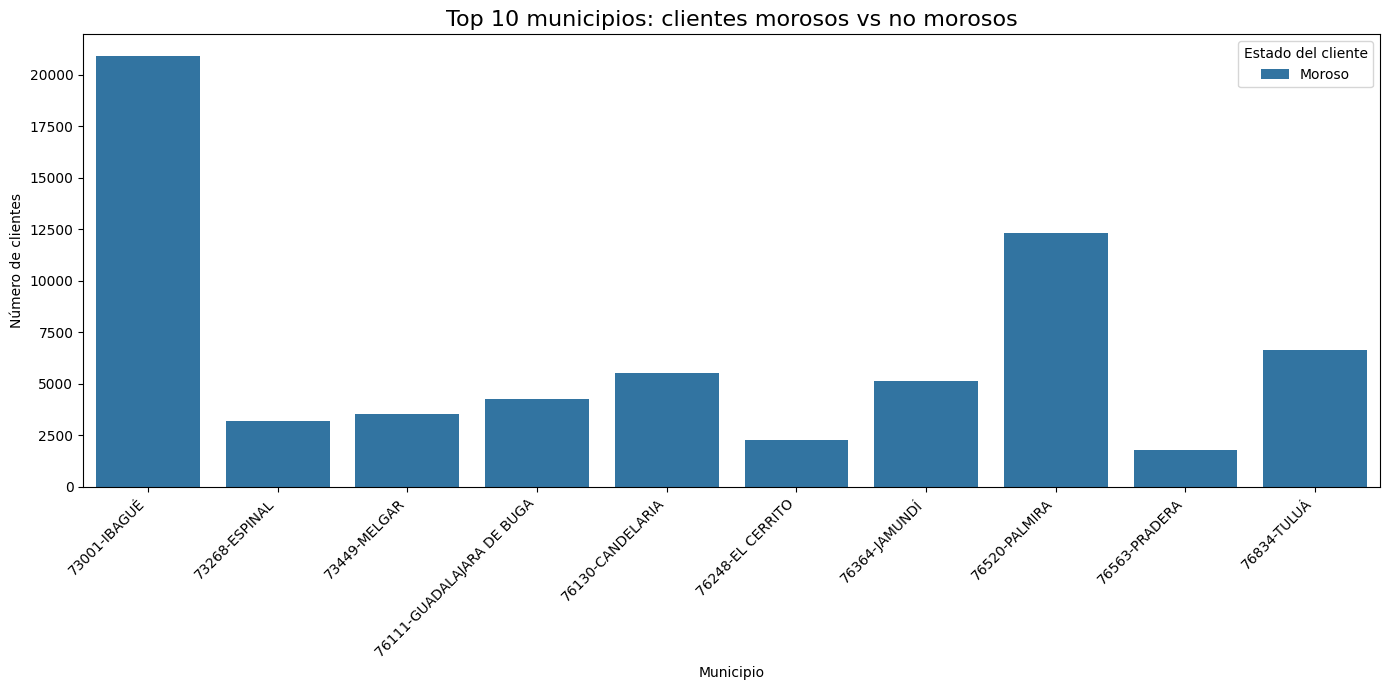

In [23]:
df = pd.read_csv("./data/dataset_deudamorosa.csv", sep=';')

df['ES_MOROSO'] = df['DEUDA'].apply(lambda x: 1 if x > 0 else 0)

top_municipios_morosidad = df.groupby('MUNICIPIO').agg(
    TOTAL_CLIENTES=('ES_MOROSO', 'count'),
    TOTAL_MOROSOS=('ES_MOROSO', 'sum'),
    PORCENTAJE_MOROSIDAD=('ES_MOROSO', 'mean')
).reset_index()

top_municipios_morosidad['PORCENTAJE_MOROSIDAD'] *= 100

top_10_morosos = top_municipios_morosidad.nlargest(10, 'TOTAL_MOROSOS')

df_top10 = df[df['MUNICIPIO'].isin(top_10_morosos['MUNICIPIO'])].copy()

df_top10['MOROSO'] = df_top10['ES_MOROSO'].apply(lambda x: 'Moroso' if x == 1 else 'No Moroso')

municipio_morosidad_top10 = df_top10.groupby(['MUNICIPIO', 'MOROSO']).size().reset_index(name='count')

# Creamos gráfico de barras
plt.figure(figsize=(14,7))
sns.barplot(data=municipio_morosidad_top10, x='MUNICIPIO', y='count', hue='MOROSO')

plt.title("Top 10 municipios: clientes morosos vs no morosos", fontsize=16)
plt.xlabel("Municipio")
plt.ylabel("Número de clientes")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Estado del cliente")
plt.tight_layout()
plt.show()

#### **Bubble Map**